In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from tqdm import tqdm

In [13]:
models = [
    "pca",
    "mosaicfm-70m-pretrained",
    "mosaicfm-70m-adapted",
    "mosaicfm-70m-from-scratch",
    "mosaicfm-70m-tahoe",
    "mosaicfm-70m-merged",
    "mosaicfm-v2-1_3b-merged"
]

In [17]:
# compute results
dfs = []
for m in tqdm(models):
    mlp_preds = pd.read_csv(f"/vevo/umair/data/sens-pred/mlp-preds/{m}_split_cl.csv")
    probe_preds = pd.read_csv(f"/vevo/umair/data/sens-pred/mlp-preds/probe_{m}_split_cl.csv")
    mlp_r2 = mlp_preds.drop(columns=["broad_id"]).groupby(mlp_preds["broad_id"]).apply(lambda g: r2_score(g["growth_rate"], g["predicted"])).reset_index(name="r2")
    probe_r2 = probe_preds.drop(columns=["broad_id"]).groupby(probe_preds["broad_id"]).apply(lambda g: r2_score(g["growth_rate"], g["predicted"])).reset_index(name="r2")
    mlp_r2["architecture"] = ["mlp"] * mlp_r2.shape[0]
    probe_r2["architecture"] = ["linear-probe"] * probe_r2.shape[0]
    r2 = pd.concat([mlp_r2, probe_r2])
    r2["embedding"] = [m] * r2.shape[0]
    dfs.append(r2)

# make dataframe
results = pd.concat(dfs)
results

100%|██████████| 7/7 [00:13<00:00,  1.99s/it]


,broad_id,r2,architecture,embedding
0,BRD-A00077618-236-07-6,0.083815,mlp,pca
1,BRD-A00758722-001-04-9,0.790174,mlp,pca
2,BRD-A01643550-001-04-9,0.005367,mlp,pca
3,BRD-A02180903-001-04-5,-0.014873,mlp,pca
4,BRD-A03216249-003-24-3,-0.006816,mlp,pca
...,...,...,...,...
1497,BRD-M92675308-003-07-1,0.381979,linear-probe,mosaicfm-v2-1_3b-merged
1498,BRD-M97302542-001-03-6,0.668863,linear-probe,mosaicfm-v2-1_3b-merged
1499,BRD-M97302542-001-04-4,-5.230622,linear-probe,mosaicfm-v2-1_3b-merged
1500,BRD-U25960968-000-01-9,-2.525833,linear-probe,mosaicfm-v2-1_3b-merged


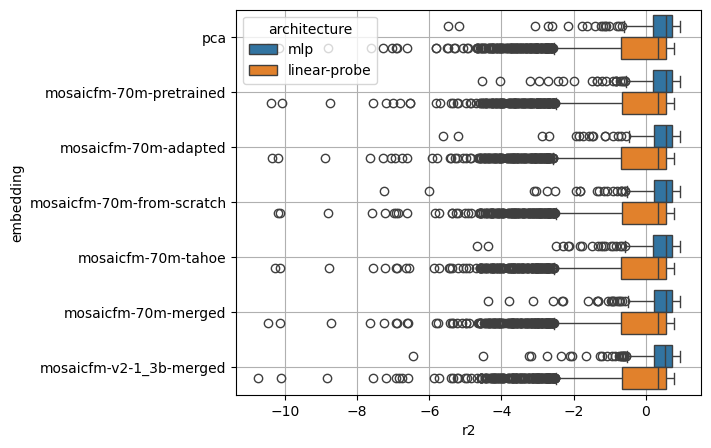

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="architecture", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()